<a href="https://colab.research.google.com/github/ltardap/Visualizaci-nDatos-PEC2/blob/main/PEC2_Arc_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PEC 2 - Arc Diagram - Laura Tardà Pérez

Asignatura Visualización de datos

In [ ]:
# Instalar las bibliotecas necesarias
!pip install pandas arcplot kagglehub matplotlib

In [ ]:
# Importar las bibliotecas
import pandas as pd
import os
from arcplot import ArcDiagram
import kagglehub
import matplotlib.pyplot as plt
import time

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Descargar dataset desde Kaggle
extraction_path = kagglehub.dataset_download("usdot/flight-delays")
print("Path to dataset files:", extraction_path)

Path to dataset files: /kaggle/input/flight-delays


In [ ]:
# Función para extraer los datos necesarios del CSV de vuelos
def extract_flight_data(csv_file):
    print("Leyendo archivo CSV...")
    flights_df = pd.read_csv(
        csv_file,
        usecols=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'],
        dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str},
        low_memory=False
    )
    # Eliminar filas con datos de aeropuerto faltantes
    flights_df.dropna(inplace=True)
    # Eliminar vuelos donde origen y destino son iguales
    flights_df = flights_df[flights_df['ORIGIN_AIRPORT'] != flights_df['DESTINATION_AIRPORT']]

    # Selección de un samle de 50 vuelos aleatorios
    flights_df = flights_df.sample(50)

    print(f"Datos procesados: {len(flights_df)} filas")
    return flights_df

In [ ]:
def createarcdiagram(df, node1, node2, title='Flight Connections Arc Diagram'):
    print("Creación del diagrama...")

    # Obtener todos los nodos
    nodes = list(set(df[node1].unique().tolist() + df[node2].unique().tolist()))
    print(f"Número de nodos únicos: {len(nodes)}")

    # Crear el diagrama
    arcdiag = ArcDiagram(nodes, title)
    print("Diagrama creado - conectando nodos...")

    # Conectar los nodos
    for i, connection in enumerate(df.iterrows()):
        arcdiag.connect(connection[1][node1], connection[1][node2])
        if i % 1000 == 0:
            print(f"Conectados {i} de {len(df)} nodos...")

    print("Estableciendo colores...")
    arcdiag.set_custom_colors(['black'] * len(nodes))

    # Rotar etiquetas verticalmente
    arcdiag.set_label_rotation_degree(90)

    # Mostrar el diagrama
    arcdiag.show_plot(
        node_size=10,
        width=20,
        height=10
    )

    return None

In [ ]:
# 1. Identificar el archivo CSV relevante
csv_file = os.path.join(extraction_path, 'flights.csv')
print(f"Archivo CSV: {csv_file}")

# 2. Extracción y preparación de datos
flights_df = extract_flight_data(csv_file)

print("\nMuestra de los datos:")
print(flights_df.head())

Archivo CSV: /kaggle/input/flight-delays/flights.csv
Leyendo archivo CSV...
Datos procesados: 50 filas

Muestra de los datos:
        ORIGIN_AIRPORT DESTINATION_AIRPORT
5460576            PHL                 STL
1749196            LAS                 DEN
5217841            ORD                 ERI
5144447            JFK                 STT
5683998            SJC                 SLC


Creación del diagrama...
Número de nodos únicos: 60
Diagrama creado - conectando nodos...
Conectados 0 de 50 nodos...
Estableciendo colores...


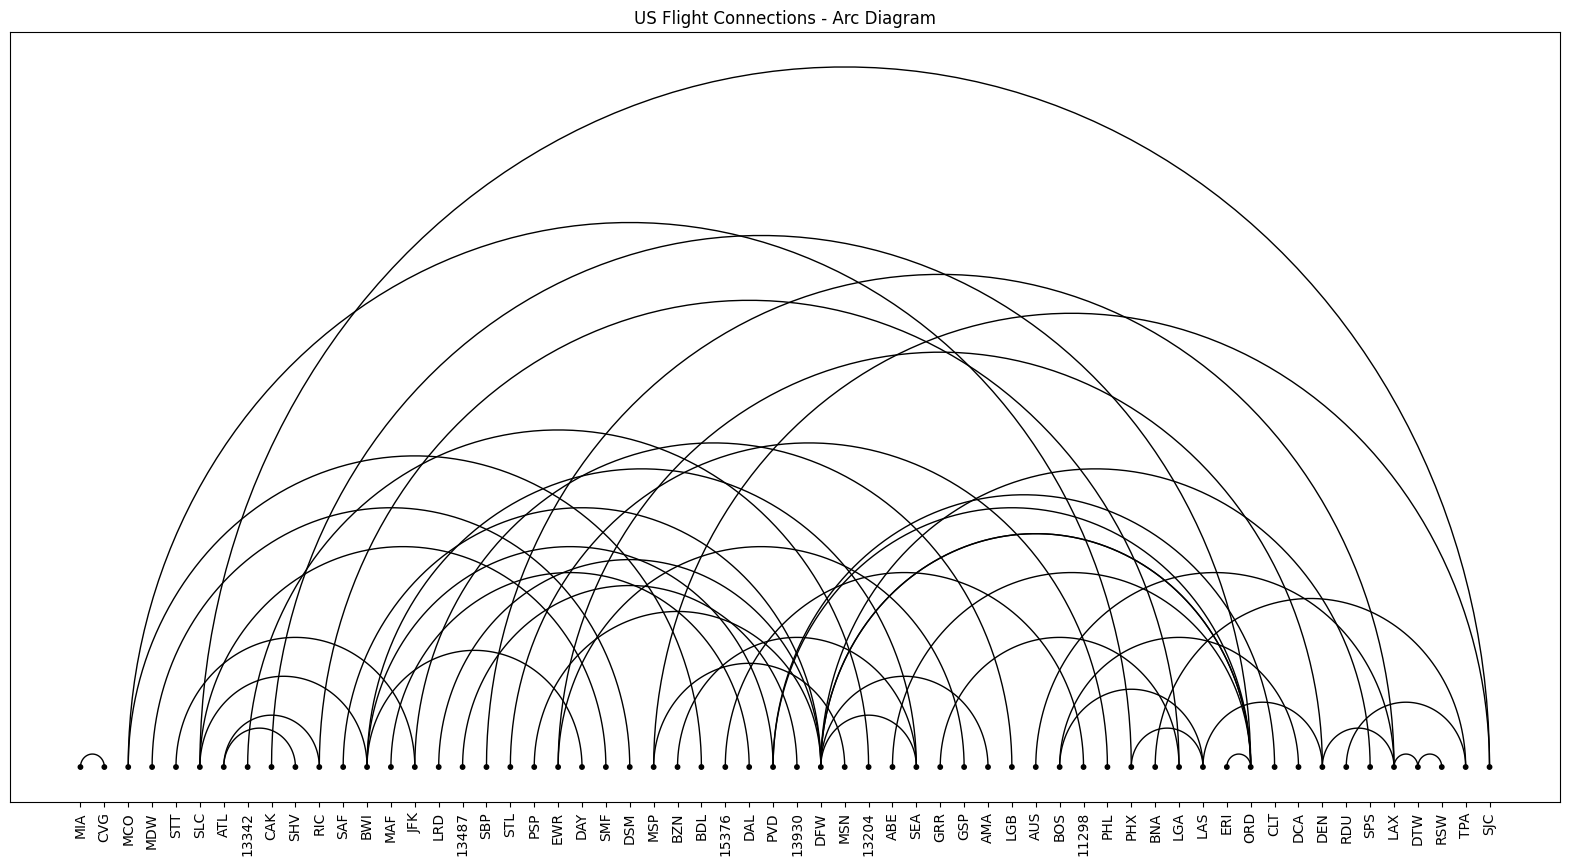

In [ ]:
# 3. Crear y guardar el diagrama de arco
diagram_path = createarcdiagram(
    flights_df,
    node1='ORIGIN_AIRPORT',
    node2='DESTINATION_AIRPORT',
    title='US Flight Connections - Arc Diagram'
)